# Project 2 - Data Visualization of XYZ company.

#### Data from a well-established organization's Human Resources (HR) department offers significant insights into workforce dynamics and effective HR management practices.
#### Through the examination of this data, the organization can attain a more profound comprehension of its employees, their performance, and the factors shaping their engagement and satisfaction levels.
#### By thoroughly exploring HR data through Exploratory Data Analysis (EDA), our goal is to extract valuable insights that can guide decision-making processes related to talent recruitment, performance assessment, employee retention, and the overarching HR strategy. These insights are instrumental in helping the organization refine its HR practices, cultivate a positive workplace atmosphere, and elevate overall employee well-being and productivity.





### **Import all required libraries**

In [1]:
# Importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   
import plotly.express as px

# Loading our data
df = pd.read_csv('HRDataset_v14.csv')

### **Exploration of Data**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### **Remowing some columns**

In [3]:
# We will remove unrelevant columns from our Dataset.

columns_to_drop = ['Termd','ManagerID','EmpID','MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','PerfScoreID','FromDiversityJobFairID','PositionID','Zip','DateofHire.1']
df = df.drop(columns=columns_to_drop)

### **Samples from our data**

In [54]:
df.head(5)

,Employee_Name,Salary,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_YEAR,Age_Group
0,"Adinolfi, Wilson K",62506,Production Technician I,MA,1983-07-10,M,Single,US Citizen,No,07-05-2011,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,1983,1981-1990
1,"Ait Sidi, Karthikeyan",104437,Sr. DBA,MA,1975-05-05,M,Married,US Citizen,No,3/30/2015,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,1975,1971-1980
2,"Akinkuolie, Sarah",64955,Production Technician II,MA,1988-09-19,F,Married,US Citizen,No,07-05-2011,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1988,1981-1990
3,"Alagbe,Trina",64991,Production Technician I,MA,1988-09-27,F,Married,US Citizen,No,01-07-2008,...,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15,1988,1981-1990
4,"Anderson, Carol",50825,Production Technician I,MA,1989-09-08,F,Divorced,US Citizen,No,07-11-2011,...,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2,1989,1981-1990


### **Dataset columns**

In [55]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'DateofHire',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'DOB_YEAR', 'Age_Group'],
      dtype='object')

### **Description of relevant continous values**

In [4]:
df.describe().round()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.0,311.0,311.0,311.0,311.0,311.0
mean,69021.0,4.0,4.0,1.0,0.0,10.0
std,25157.0,1.0,1.0,2.0,1.0,6.0
min,45046.0,1.0,1.0,0.0,0.0,1.0
25%,55502.0,4.0,3.0,0.0,0.0,5.0
50%,62810.0,4.0,4.0,0.0,0.0,10.0
75%,72036.0,5.0,5.0,0.0,0.0,15.0
max,250000.0,5.0,5.0,8.0,6.0,20.0


# **Visualization of the data**

## 1. Salary Analysis

#### 1.1 Distribution of salary by gender using pie plot


In [7]:

fig = px.pie(df, values='Salary',
             names='Sex',
             title='Distribution of salary by gender')

fig.update_traces(textinfo='percent+label', textfont_size=20)

fig.update_layout(
    title=dict(x=0.5, y=0.95,
                xanchor='center', yanchor='top',
                  font=dict(size=25)),
                  height=600, width=600)
fig.show()

#### 1.2 This chart shows salary distribution.


<Figure size 1000x1500 with 0 Axes>

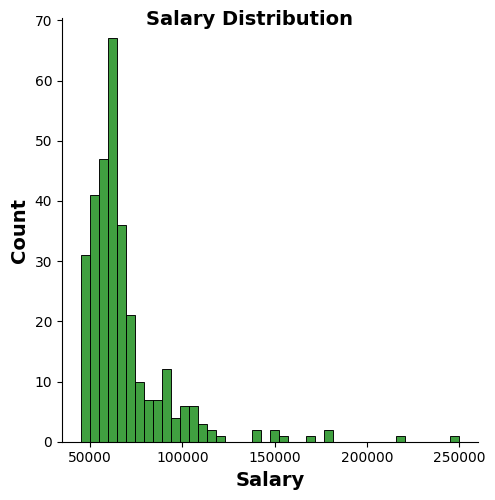

In [8]:

fig = plt.figure(figsize=(10,15))
g = sns.displot(data=df['Salary'],color='Green')
g.fig.suptitle('Salary Distribution',fontsize=14,fontweight='bold')
g.set_xlabels('Salary', fontsize=14, fontweight='bold')
g.set_ylabels('Count', fontsize=14, fontweight='bold')

plt.show()

#### 1.3 Distribution of salary by Gender and Department - Sub Plots

In [9]:


import plotly.graph_objects as go 
from plotly.subplots import make_subplots


fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles = ['Distribution of Salary by Gender', 'Distribution of Salary by Department'])
fig.add_trace(go.Pie(labels=df['Sex'], values=df['Salary'], name='Gender'), 1, 1)

fig.add_trace(go.Pie(labels=df['Department'], values=df['Salary'], name='Department'), 1, 2)


fig.update_traces(textinfo='percent+label', pull=[0.05, 0], hole=0.3)
fig.update_layout(title=dict(x=0.5, y=0.95,
                xanchor='center', yanchor='top',
                  font=dict(size=25)),height=500, width=1200, title_text='Distribution of Salary by Gender and Department')

fig.show()

#### 1.4 Distribution of Salary by Department - Box Plot


In [10]:

fig = px.box(df,x='Department',
             y='Salary',
             color='Department',
             title='Distribution of Salary by Department',
             height=700,width=900)
fig.show()

#### 1.5 Distributionof Salary by Sex in Departments.


In [11]:

total_salary = df.groupby(['Sex','Department'])['Salary'].sum().reset_index()
total_salary['Label'] = total_salary['Sex'] + ' - ' + total_salary['Department']

fig = px.pie(total_salary,values='Salary',
              names='Label',
              title='Salary Distribution by Gender in Departments',
              custom_data=['Sex'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title=dict(x=0.5, y=0.95,
                xanchor='center', yanchor='top',
                  font=dict(size=25)),
                  height=600, width=800)
fig.show()


#### 1.6 Distribution of Salary by Position


In [12]:

fig = px.pie(df,values='Salary', 
             names='Position', 
             title='Distribution of Salary by Positions')
fig.update_traces(textinfo='percent+label', textfont_size=10)

fig.update_layout(
    title=dict(x=0.5, y=0.95,
                xanchor='center', yanchor='top',
                  font=dict(size=25)),
                  height=1000, width=800)
fig.show()

#### 1.7 Distribution of Salary by Gender, Department, and Combined

In [13]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Distribution of Salary by Gender', 'Distribution of Salary by Department', 'Combined Distribution'])

fig.add_trace(go.Pie(labels=df['Sex'], values=df['Salary'], name='Gender'), 1, 1)
fig.add_trace(go.Pie(labels=df['Department'], values=df['Salary'], name='Department'), 1, 2)
fig.add_trace(go.Pie(labels=[f"{sex} - {dept}" for sex, dept in zip(df['Sex'], df['Department'])], values=df['Salary'], name='Combined'), 1, 3)

fig.update_traces(textinfo='percent+label', pull=[0.05, 0], hole=0.3)

fig.update_layout(height=600, width=1500, title_text='Distribution of Salary by Gender, Department, and Combined')

fig.show()


# 2. DEMOGRAPHIC ANALYSIS


#### 2.1 Gender Distribution - Bar Plot

In [14]:
gender_total = len(df['Sex'])
gender_value = df['Sex'].value_counts()
gender_percent = (gender_value / gender_total) * 100

In [15]:
gender_percent

Sex
F     56.59164
M     43.40836
Name: count, dtype: float64

C:\Users\djabb\AppData\Local\Temp\ipykernel_24556\1652361611.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




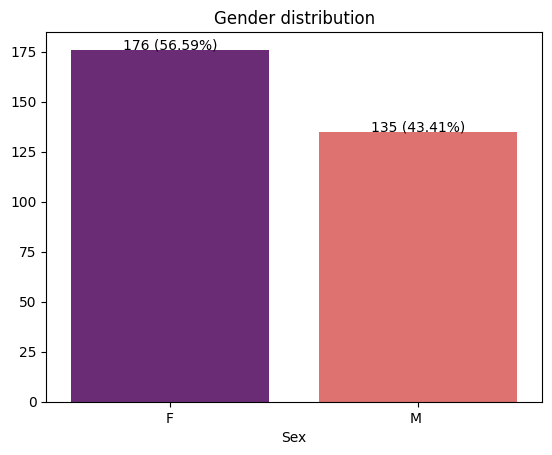

In [16]:
sns.barplot(x=gender_value.index,
             y=gender_value.values,
             palette='magma')
plt.title('Gender distribution')
for index, value in enumerate(gender_value):
    plt.text(index,value, f'{value} ({gender_percent[index]:.2f}%)', ha='center')

plt.show()

#### 2.2 Gender Distribution by Department- Count Plot

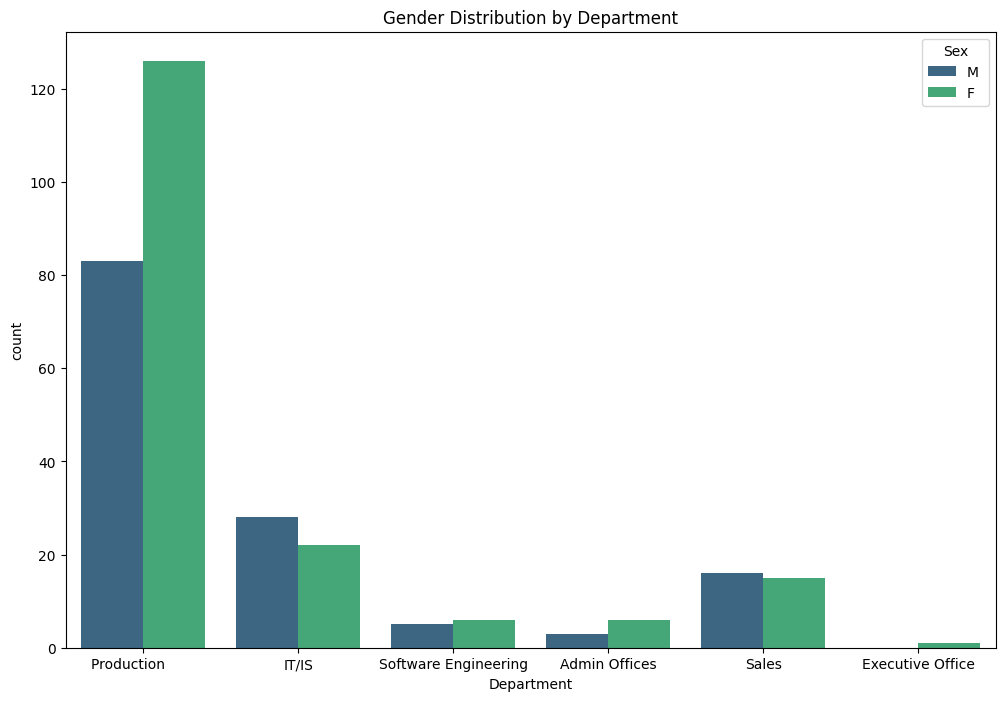

In [17]:

plt.figure(figsize=(12, 8))
sns.countplot(x='Department',
              hue='Sex',
              data=df,palette='viridis')
plt.title('Gender Distribution by Department')
plt.show()


#### 2.3 Distribution of Marital Status by Gender using bar plot.

In [18]:

fig = px.bar(df, x='MaritalDesc',
             color='Sex',
             title='Distribution of Marital Status by Gender')


# fig.update_traces(texttemplate='percent+label', textfont_size=20)

fig.update_layout(
    xaxis_title = 'Marital Status',
    yaxis_title = 'Count',
    barmode = 'group',
    height = 600,
    width = 800,
    title=dict(text='Distribution of Marital Status by Gender', x=0.5, y=0.95, xanchor='center', yanchor='top')
)
fig.show()

#### 2.4 Number of People in Each State - Bar Plot

C:\Users\djabb\AppData\Local\Temp\ipykernel_24556\22686280.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




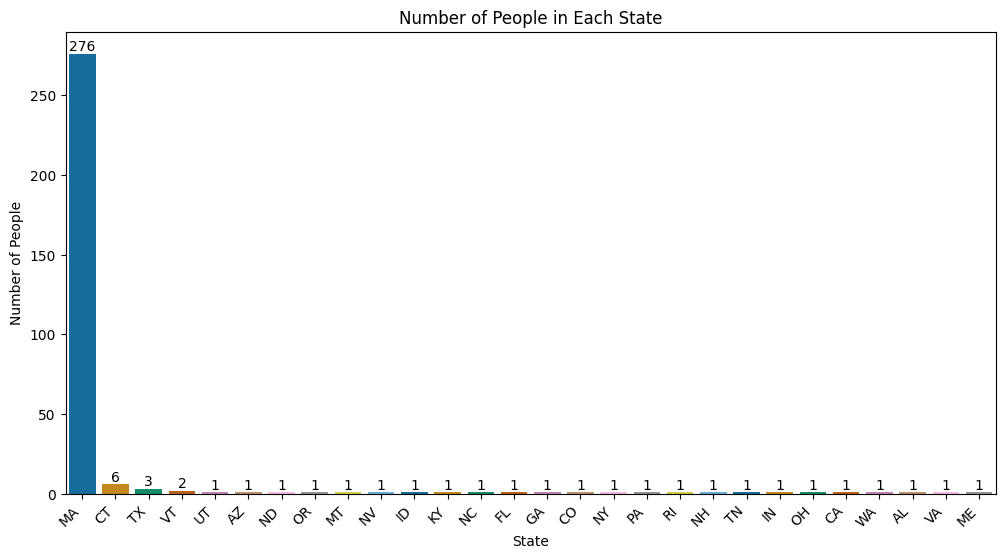

In [19]:
# 1.3. Distribution of People in States.

state_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index,
            y=state_counts.values,
            palette='colorblind')
plt.title('Number of People in Each State')
plt.xlabel('State')
plt.ylabel('Number of People')

# Adding annotations above each bar
for index, value in enumerate(state_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#### 2.4.1 Department Distribution in each State - Bar Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a pivot table to count the occurrences of each department in each state
pivot_table = pd.crosstab(df['State'], df['Department'])

unique_states = df['State'].unique()

# Plot bar charts for each state
for state in unique_states:
    department_counts = pivot_table.loc[state]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
    plt.title(f'Department Distribution in {state}')
    plt.xlabel('Department')
    plt.ylabel('Count')
    
    # Rotate department names to 45 degrees
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


#### 2.5 Distribution of workers on the Map by State - Folium Lib.

In [21]:
import folium
state_coordinates = {'MA':(42.407211, -71.382439),
                     'TX':(31.968599, -99.901813),
                      'CT':(41.603221,-73.087749), 
                      'VA':(37.431573,	-78.656894),
                      'VT':(44.558803,-72.577841),
                      'AL':(32.318231,-86.902298),
                      'WA':(47.751074,-120.740139),
                      'CA':(36.778261,-119.417932),
                      'OH':(40.417287,-82.907123), 
                      'IN':(40.551217,-85.602364),
                      'TN':(35.517491,-86.580447),
                      'NH':(43.193852,-71.572395),
                      'RI':(41.580095,-71.477429),
                      'PA':(41.203322,-77.194525),
                      'CO':(39.550051,-105.782067), 
                      'NY':(43.299428,-74.217933),
                      'UT':(39.32098,-111.093731),
                      'GA':(32.157435,-82.907123),
                      'FL':(27.664827,-81.515754),
                     'NC':(35.759573,-79.0193),
                     'KY':(37.839333,-84.270018),
                     'ID':(44.068202,-114.742041),
                     'NV':(38.80261,-116.419389),
                     'MT':(46.879682,-110.362566),
                     'OR':(43.804133,-120.554201),
                     'ND':(47.551493,-101.002012),
                     'AZ':(34.048928,-111.093731),
                     'ME':(45.253783,-69.445469)}


# Creating a map centered on the United States
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Plot markers for each state
for state, coordinates in state_coordinates.items():
    folium.Marker(location=coordinates, popup=state).add_to(map_us)

# Saving the map
map_us.save('us_map1.html')


### 2.6 Distribution of ages.

##### **'DOB' column is object type. Let's change it to data time type.**

In [22]:
df[['DOB']].dtypes

DOB    object
dtype: object

In [23]:
df['DOB'].head(6)

0    07-10-1983
1    05-05-1975
2      09/19/88
3      09/27/88
4    09-08-1989
5      05/22/77
Name: DOB, dtype: object

In [24]:
# We will replace '/' to '-'
df['DOB'] = df['DOB'].str.replace('/','-')

In [25]:
df['DOB'].head(6)

0    07-10-1983
1    05-05-1975
2      09-19-88
3      09-27-88
4    09-08-1989
5      05-22-77
Name: DOB, dtype: object

##### In the code below we add '19' to our data. Change 09-19-88 to 09-19-1988

In [26]:
df['DOB'] = df['DOB'].apply(lambda x: '-'.join(['19' + y if len(y) == 2 and int(y) >=40 else y for y in x.split('-')]))
print(df['DOB'].values)

['07-10-1983' '05-05-1975' '09-19-1988' '09-27-1988' '09-08-1989'
 '05-22-1977' '05-24-1979' '02-18-1983' '02-11-1970' '01-07-1988'
 '01-12-1974' '02-21-1974' '07-04-1988' '07-20-1983' '07-15-1977'
 '10-18-1981' '04-17-1966' '10-27-1970' '04-04-1986' '04-06-1979'
 '12-22-1970' '12-27-1958' '09-01-1989' '09-21-1990' '01-16-1967'
 '07-30-1964' '04-04-1987' '03-10-1970' '08-24-1990' '11-24-1987'
 '07-28-1983' '10-30-1969' '06-01-1964' '03-02-1980' '08-19-1977'
 '11-22-1966' '08-09-1983' '04-05-1987' '02-02-1983' '06-06-1986'
 '05-15-1963' '01-02-1951' '02-09-1972' '02-12-1979' '08-24-1983'
 '06-11-1970' '08-27-1983' '05-31-1988' '09-05-1985' '08-31-1981'
 '11-25-1978' '08-26-1980' '09-08-1977' '08-12-1979' '12-17-1975'
 '03-19-1983' '03-31-1977' '08-26-1986' '04-10-1987' '09-09-1965'
 '04-19-1990' '01-18-1952' '11-05-1978' '09-14-1979' '04-15-1988'
 '10-31-1977' '07-05-1979' '11-02-1975' '02-25-1951' '04-19-1967'
 '09-04-1983' '11-15-1982' '05-14-1987' '12-02-1978' '10-07-1986'
 '07-18-19

##### In this code we change 'DOB' column to date type.

In [27]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m-%d-%Y')
print(df['DOB'])

0     1983-07-10
1     1975-05-05
2     1988-09-19
3     1988-09-27
4     1989-09-08
         ...    
306   1985-05-11
307   1982-05-04
308   1979-08-30
309   1979-02-24
310   1978-08-17
Name: DOB, Length: 311, dtype: datetime64[ns]


##### Distribution of ages- Displot

<Figure size 1500x800 with 0 Axes>

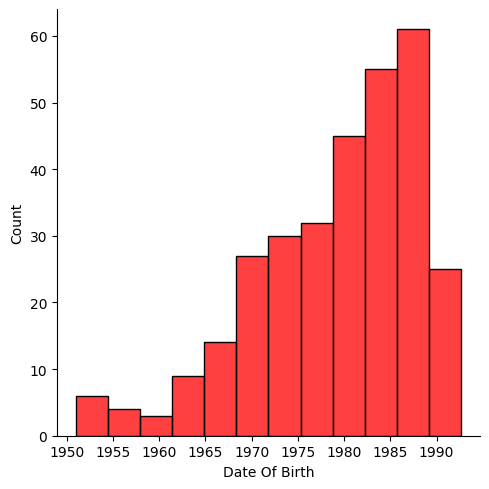

In [28]:
# Distribution of ages.

fig = plt.figure(figsize=(15,8))
plot = sns.displot(data=df,
                    x='DOB',
                    color='Red'
                                )
plot.set_titles('Distribution of ages')
plot.set_xlabels('Date Of Birth')
plt.show()

#### 2.7 Distribution of people by age group - Pie chart

##### Let's create new column ['DOB_YEAR'] and add to it only year from 'DOB' column.

In [29]:
df['DOB_YEAR'] = df['DOB'].dt.year

In [30]:
df['DOB_YEAR'].unique()

array([1983, 1975, 1988, 1989, 1977, 1979, 1970, 1974, 1981, 1966, 1986,
       1958, 1990, 1967, 1964, 1987, 1969, 1980, 1963, 1951, 1972, 1985,
       1978, 1965, 1952, 1982, 1973, 1991, 1955, 1968, 1971, 1992, 1984,
       1976, 1959, 1954, 1961, 1953])

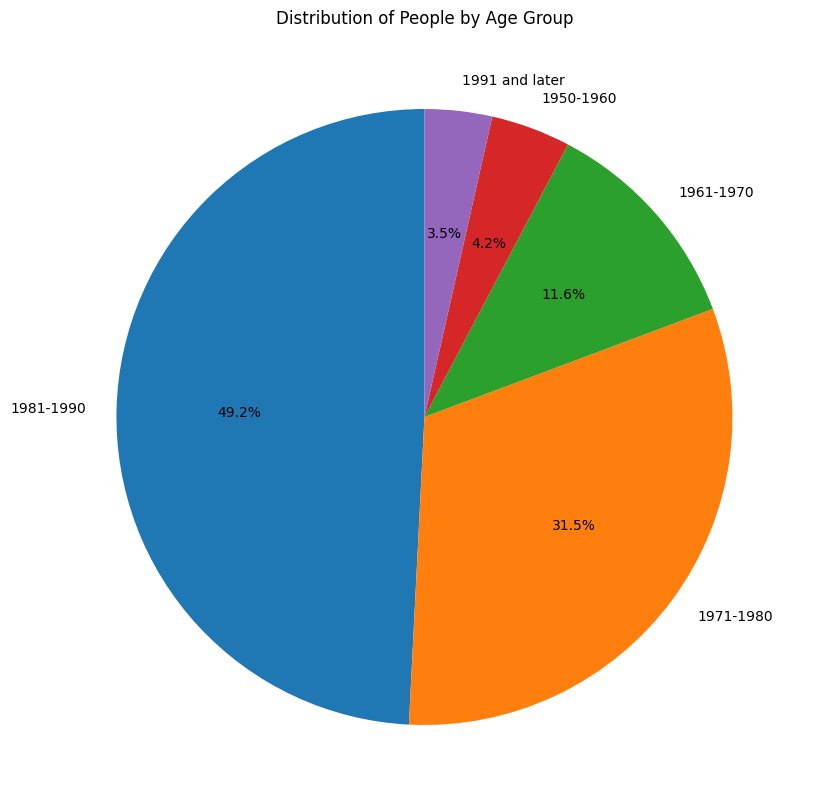

In [31]:

df['DOB_YEAR'] = df['DOB'].dt.year


bins = [1950, 1960, 1970, 1980, 1990, 2000]
labels = ['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991 and later']


df['Age_Group'] = pd.cut(df['DOB_YEAR'], bins=bins, labels=labels, right=False)

# Percentage of each age group
total_age = len(df['DOB'])
age_group_percentage = (df['Age_Group'].value_counts() / total_age) * 100

plt.figure(figsize=(10, 10))
age_group_percentage.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of People by Age Group')
plt.ylabel('')
plt.show()


#### 2.8 Distribution of People by birth year.

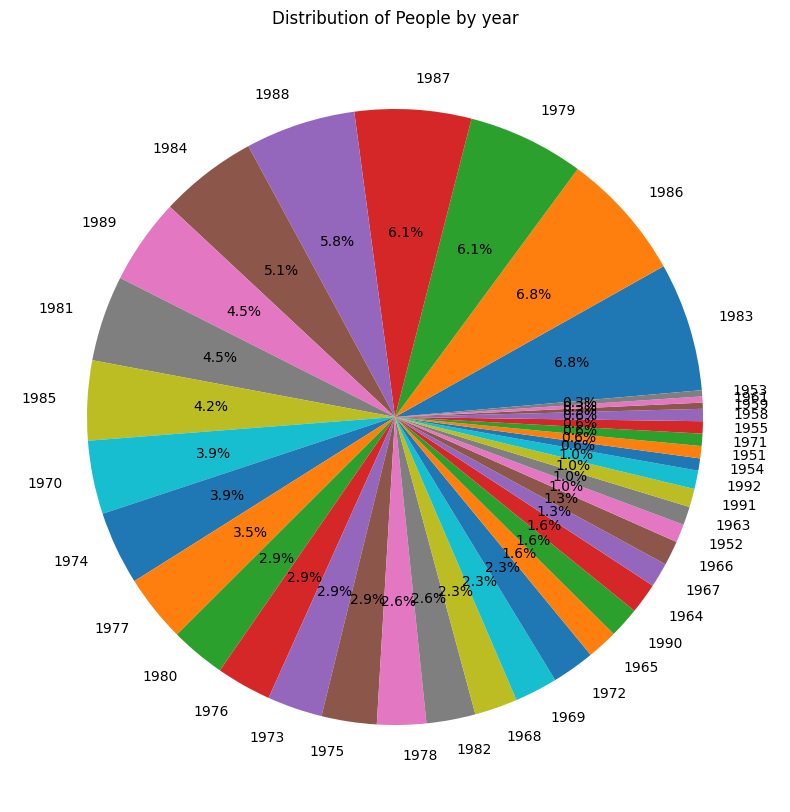

In [32]:
total_age = len(df['DOB'])
dob_counts = df['DOB_YEAR'].value_counts()
dob_percentage = (dob_counts / total_age) * 100

plt.figure(figsize=(10, 10))
dob_percentage.plot.pie(autopct='%1.1f%%',startangle=5)
plt.title('Distribution of People by year')
plt.ylabel('')  # This removes the default 'ylabel' text
plt.show()

# 3. DEPARTMENT ANALYSIS


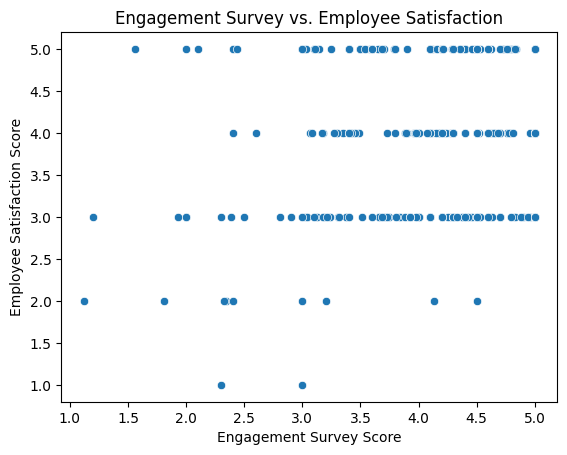

In [33]:
# Employee satisfaction vs Engagement Survey

sns.scatterplot(data=df, x='EngagementSurvey', y='EmpSatisfaction')
plt.title('Engagement Survey vs. Employee Satisfaction')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Employee Satisfaction Score')
plt.show()

In [34]:
correlation = df['EngagementSurvey'].corr(df['EmpSatisfaction'])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.18710517982625036


### 3.1 Overall Employees satisfaction by Department.

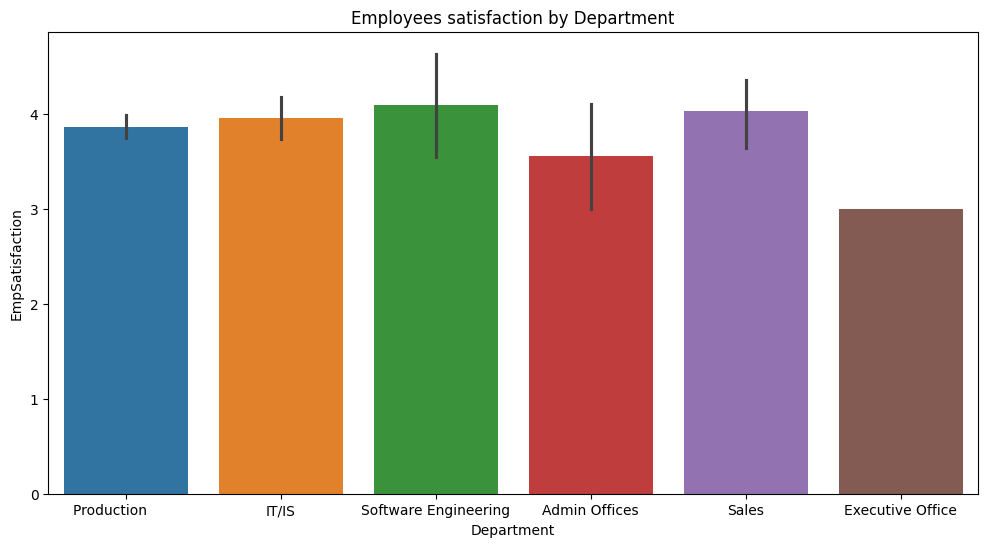

In [35]:
# Department Satisfaction rates.

plt.figure(figsize=(12,6))
sns.barplot(df, x='Department',
            y='EmpSatisfaction',
            hue='Department')
plt.title('Employees satisfaction by Department')

plt.show()

#### 3.1.1 Low satisfaction rates by Department.

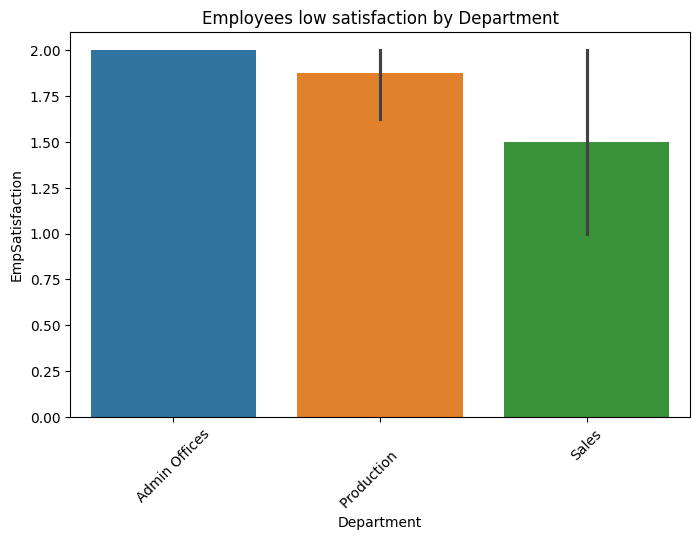

In [36]:
# Low satisfaction rates by Department.

low_satisfaction = df[df['EmpSatisfaction'] < 3]
plt.figure(figsize=(8,5))

sns.barplot(data=low_satisfaction,
             x='Department', 
             y='EmpSatisfaction',hue='Department')
# plt.xlabel('Department',fontweight='bold',fontsize=14)
# plt.ylabel('EmpSatisfaction',fontweight='bold',fontsize=14)
plt.title('Employees low satisfaction by Department')
plt.xticks(rotation=45)

plt.show()

In [37]:
#  Employees satisfaction by Gender.

fig = px.pie(df, values='EmpSatisfaction',
             names='Sex',
             color='Sex',
             title='Employees satisfaction by Gender')
fig.update_layout(
    title=dict(x=0.5, y=0.95,
                xanchor='center', yanchor='top',
                  font=dict(size=25)),
                  height=500, width=800)
                
fig.show()

#### 3.2 Overall Engagement Survey by Department.

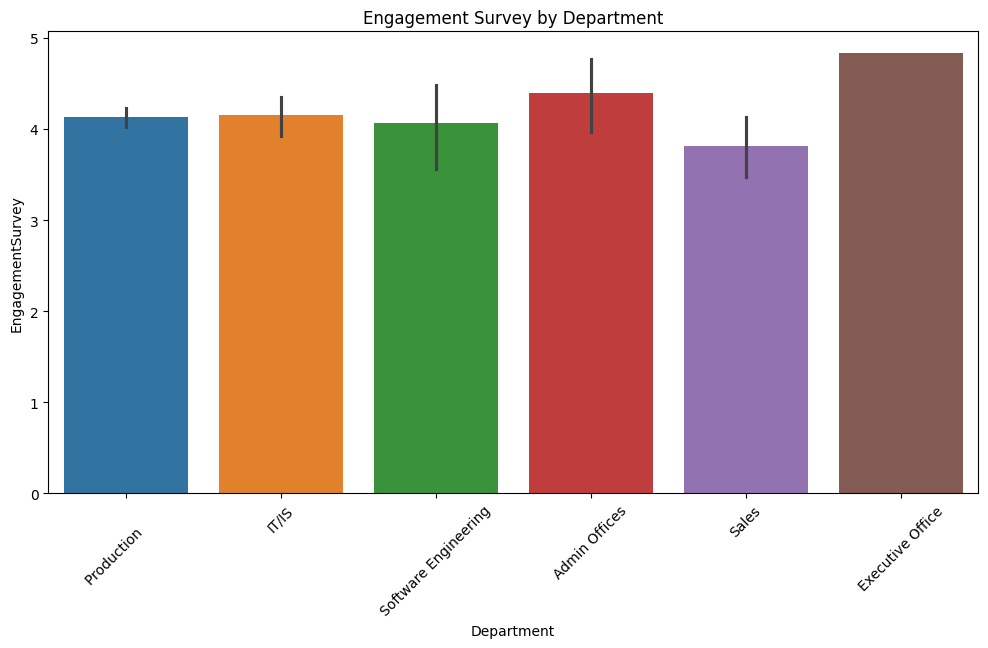

In [38]:
#  Engagement Survey by Department.

plt.figure(figsize=(12,6))

sns.barplot(data=df, x='Department', y='EngagementSurvey',hue='Department')
plt.title('Engagement Survey by Department')

# plt.xlabel('Department',fontweight='bold',fontsize=14)
# plt.ylabel('EngagementSurvey',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)


plt.show()

#### 3.2 Low Engagement by Department.

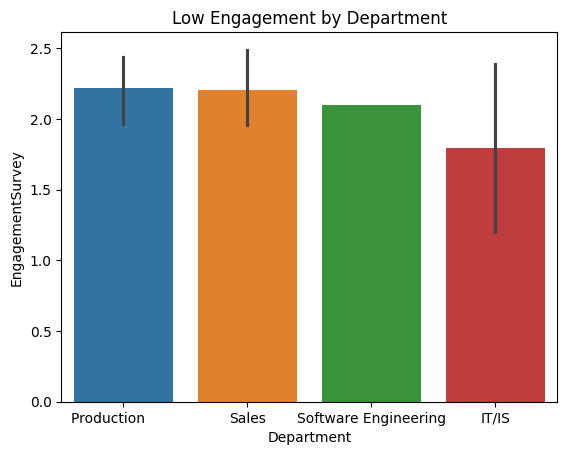

In [39]:
#  Low Engagement Survey by Department.

low_engagement = df[df['EngagementSurvey'] < 3]
sns.barplot(data=low_engagement,x='Department',y='EngagementSurvey',hue='Department')
plt.title('Low Engagement by Department')

plt.show()


In [40]:
term_reason_count = df.groupby(['TermReason', 'Department']).size()
result = pd.DataFrame(term_reason_count)
result

0
TermReason                       Department               
Another position                 IT/IS                   1
                                 Production             17
                                 Sales                   1
                                 Software Engineering    1
Fatal attraction                 Sales                   1
Learned that he is a gangster    IT/IS                   1
N/A-StillEmployed                Admin Offices           7
                                 Executive Office        1
                                 IT/IS                  40
                                 Production            126
                                 Sales                  26
                                 Software Engineering    7
attendance                       Production              5
                                 Sales                   1
                                 Software Engineering    1
career change                    Admin Offices           1
                                 IT/IS                   1
                                 Production              6
                                 Software Engineering    1
gross misconduct                 Production              1
hours                            IT/IS                   2
                                 Production              6
maternity leave - did not return Production              2
                                 Sales                   1
medical issues                   IT/IS                   1
                                 Production              1
                                 Software Engineering    1
military                         Production              4
more money                       Production             11
no-call, no-show                 Admin Offices           1
                                 IT/IS                   2
                                 Production              1
performance                      IT/IS                   2
                                 Production              2
relocation out of area           Production              4
                                 Sales                   1
retiring                         Production              4
return to school                 Production              5
unhappy                          Production             14

### 3.3 Term Reasons by Department - Sunburst plots

In [41]:
fig = px.sunburst(df, path=['Department', 'TermReason'])
fig.update_layout(title='Sunburst Chart of Term Reasons by Department',
                  width=900,
                  height=600)

fig.show()


In [42]:
percent_df = df.groupby(['Department','TermReason']).size() / df.groupby('Department').size()
percent_df

Department            TermReason                      
Admin Offices         N/A-StillEmployed                   0.777778
                      career change                       0.111111
                      no-call, no-show                    0.111111
Executive Office      N/A-StillEmployed                   1.000000
IT/IS                 Another position                    0.020000
                      Learned that he is a gangster       0.020000
                      N/A-StillEmployed                   0.800000
                      career change                       0.020000
                      hours                               0.040000
                      medical issues                      0.020000
                      no-call, no-show                    0.040000
                      performance                         0.040000
Production            Another position                    0.081340
                      N/A-StillEmployed                   0.602871
       

#### Termination reasons by Depertment with percentages.

In [43]:
percent_df = df.groupby(['Department','TermReason']).size() / df.groupby('Department').size()
percent_df = percent_df.reset_index(name='Percentage')

fig = px.sunburst(percent_df,
                  path=['Department', 'TermReason'],
                  values='Percentage',
                  title='Term Reasons by Department')
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(width=1500,
                  height=900,
                  title_x=0.5)
fig.show()

#### 3.4 Distribution of Termination Reasons by Employment Status.

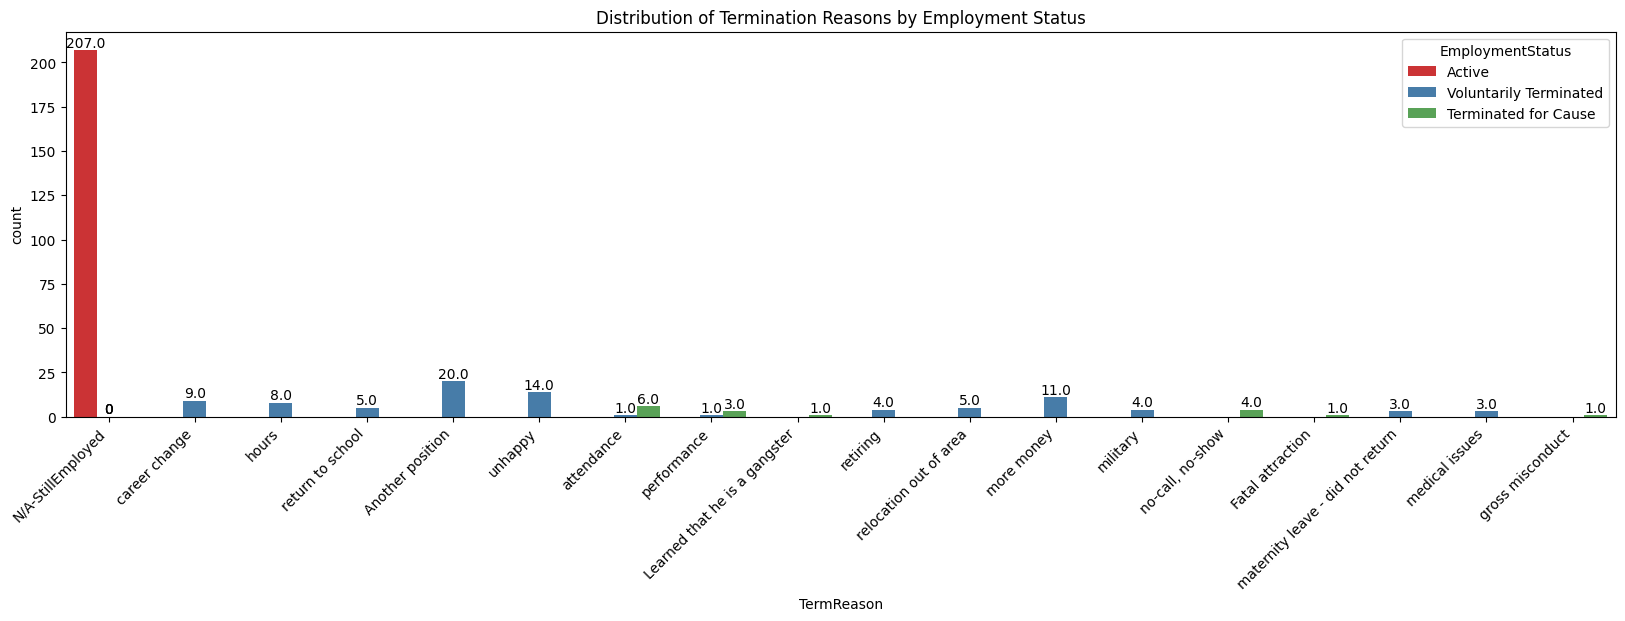

In [44]:

plt.figure(figsize=(20, 5))
ax = sns.countplot(data=df,
                   x='TermReason', 
                   hue='EmploymentStatus', 
                   palette='Set1')
plt.title('Distribution of Termination Reasons by Employment Status')
plt.xticks(rotation=45, ha='right') 

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


#### 3.5 Distribution of Recruitment Sources.

In [45]:
#  Distribution of Recruitment Sources

fig = px.bar(df, x='RecruitmentSource',
             color='RecruitmentSource',
             title='Distribution of Recruitment Sources')

fig.update_layout(height=600, width=1500,
                  title_x=0.5, title_y=0.9)
fig.show()

#### 3.5.1 Recruitment Sources by Department - Tree Map

In [46]:
# Tree map

fig = px.treemap(df,
                 path=['Department','RecruitmentSource'], 
                 color='RecruitmentSource', 
                 title='Tree Map of Recruitment Sources by Department')

fig.update_layout(height=800, width=1500)
fig.show()

#### 3.5.2 Recruitment Sources by Department -Tree Map

In [47]:
# Count the number of occurences for each combination of the 'Department' and 'RecruitmentSource' columns

count_df = df.groupby(['Department', 'RecruitmentSource']).size().reset_index(name='Quantity')

fig = px.treemap(count_df,
                 path=['Department', 'RecruitmentSource'],
                 values='Quantity',
                 title='Distribution of Recruitment Sources by Department',
                 color='RecruitmentSource')

# Add quantity as text annotations inside each tile
fig.update_traces(textinfo='label+value', hovertemplate='<b>%{label}</b><br>Quantity: %{value}')

# Set the figure size
fig.update_layout(height=800, width=1600,
                  title_x=0.5, title_y=0.9)

fig.show()

##### 3.5.3 Distribution of Recruitment Source by Department -Count Plot

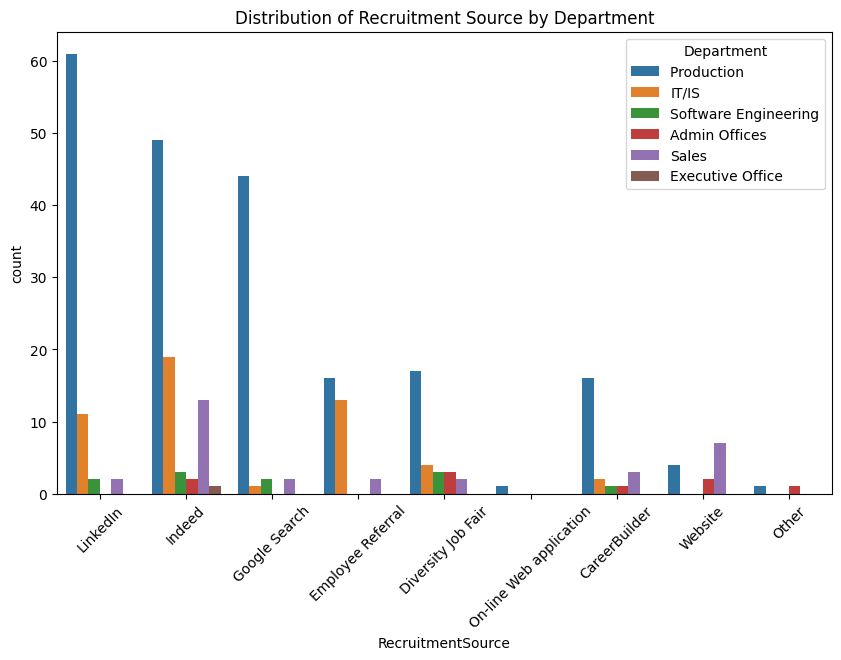

In [48]:
#   Distribution of Recruitment Source by Department.

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='RecruitmentSource', hue='Department')
plt.title('Distribution of Recruitment Source by Department')
plt.xticks(rotation=45)
plt.show()

##### Heat Map of correlation 

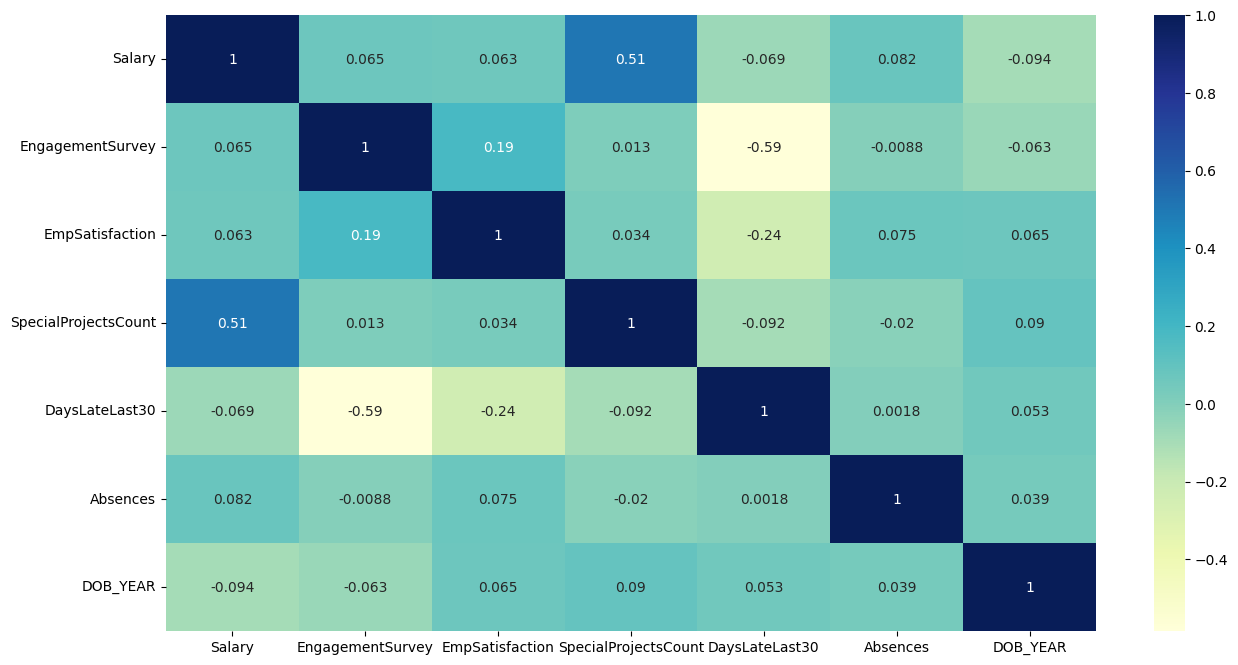

In [49]:
# Heat map Correlation between columns.

num_columns = df.select_dtypes(include=['number'])
fig = plt.figure(figsize=(15,8))
sns.heatmap(num_columns.corr(), annot=True,cmap='YlGnBu')
plt.show()

### 3.6 Departamental performance.

In [50]:
perf_len = len(df['PerformanceScore'])
perf_value = df['PerformanceScore'].value_counts()
perf_percent = (perf_value / perf_len) * 100


In [51]:
perf_percent

PerformanceScore
Fully Meets          78.135048
Exceeds              11.897106
Needs Improvement     5.787781
PIP                   4.180064
Name: count, dtype: float64

##### 3.6.1  Distribution of Performance Scores by Department in quantity and percent.

C:\Users\djabb\AppData\Local\Temp\ipykernel_24556\3587688360.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




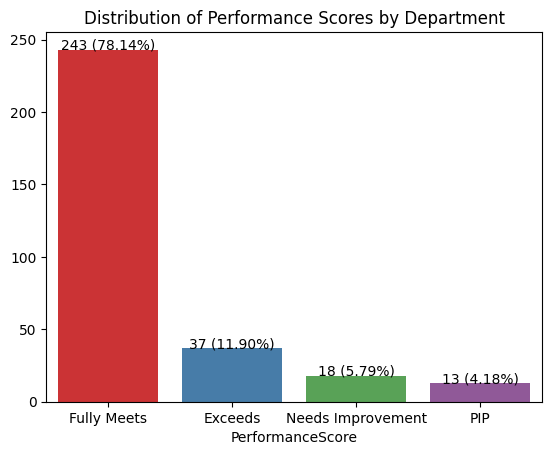

In [52]:
sns.barplot(x=perf_value.index,
            y=perf_value.values,
            palette='Set1')
plt.title('Distribution of Performance Scores by Department')

for index, value in enumerate(perf_value):
    plt.text(index,value, f'{value} ({perf_percent[index]:.2f}%)',ha='center')
plt.show()

#### 3.7 Departmental Performance

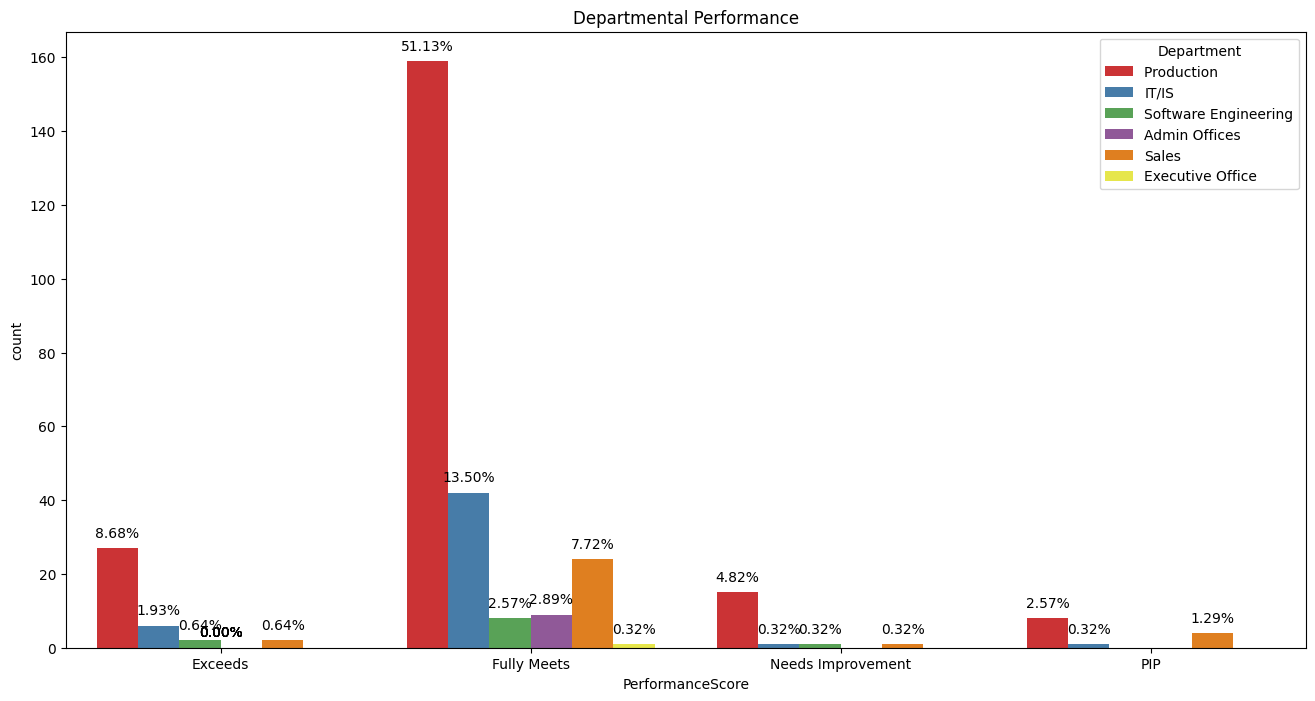

In [53]:

plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df,
                   x='PerformanceScore', 
                   hue='Department', 
                   palette='Set1')
plt.title('Departmental Performance')

# Annotate with percentages
total = len(df['Department'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height + 3, f'{height/total:.2%}', ha='center')

plt.show()
